## Table of Contents
1. [Introduction](#1.-Introductory)  
    1.0 [Introductory Section](#1.1-Introductory-Section)  
2. [Ethical Considerations](#2.-Ethical-Considerations)
3. [Variable Explanation](#3.-Variable-Explanation)
4. [Input](#4.5.-Input-Data-Summary)
5. [Data Summary](#4.5.-Input-Data-Summary)  
    4.1 [Reading File 1](#4.1-Reading-File-1)  
    5.1 [Data Summary of File 1](#5.1-Data-Summary-of-File-1)  
        5.1.1 [Manipulation of datetime for test.csv](#5.1.1-Manipulation-of-datetime-for-test.csv)  
        5.1.2 [Inspecting opening information](#5.1.2-Inspecting-opening-information)  
        5.1.3 [Inspecting promotion campaign information](#5.1.3-Inspecting-promotion-campaign-information)  
        5.1.4 [Inspecting whether State Holiday affects store opening](#5.1.4-Inspecting-whether-State-Holiday-affects-store-opening)   
        5.1.5 [Inspecting whether School Holiday affects store opening](#5.1.5-Inspecting-whether-School-Holiday-affects-store-opening)  
        4.2 [Reading File 2](#4.2-Reading-File-2)  
        5.2 [Data Summary of File 2](#5.2-Data-Summary-of-File-2)  
        4.3 [Reading File 3](#4.3-Reading-File-3)  
        5.3 [Data Summary of File 3](#5.3-Data-Summary-of-File-3)  
6. [Merging of Data Sources](#6.-Merging-of-Data-Sources)
7. [Summery Statistics](#7.-Summary-Statistics)  
    7.1 [Statistics Summary](#7.1-Statistics-Summary)  
    7.2 [Classification of Each Variable](#7.2-Classification-of-Each-Variable)  
    7.3 [Description of Variable 'Sales'](#7.3-Description-of-Variable-'Sales')
8. [Data Cleaning and Visualisation](#8.-Data-Cleaning-and-Visualisation)  
    8.1 [Detecting Missing Values](#8.1-Detecting-Missing-Values)  
    8.2 [Dealing with Missing Data](#8.2-Dealing-with-Missing-Data)
9. [Exploratory Insights and Visualisation](#9.-Exploratory-Insights-and-Visualisation)   
    9.1 [Pivoting](#9.1-Pivoting)  
    9.2 [Insights](#9.2-Insights)  
    9.3 [Conclusion](#9.3-Conclusion)

# 1. Introduction

### 1.0 Introductory Section

Rossmann is a drugstore company with a vast network of over 3,000 stores spread across seven European countries. This project revolves around the analysis of historical sales data from 1,115 Rossmann stores, with the primary objective of analysing relationship between sales performance with other factors, including promotions, competition, school and state holidays, seasonality, and locality. The aim of this project is to conduct a comprehensive examination of these factors to uncover their impact on sales performance, enabling us to develop reliable sales forecasts later on, therefore allowing extracting actionable insights for future business decisions.    

By analyzing the historical sales data, we will explore the intricate relationships between various attributes and sales performance. This in-depth analysis will provide us with a profound understanding of how factors such as promotions, competition, and seasonal variations affect the sales performance of Rossmann stores.  

Ultimately, the insights gained from this project will enable Rossmann to enhance sales strategies, improve operational efficiency, and maximize profitability across their extensive store network. By leveraging the power of data analysis, this project aims to provide Rossmann with actionable information to drive their business forward in a highly competitive market.

# 2. Ethical Considerations

The data analysis process conducted in this study adhered to the ethical guidelines and principles outlined below, ensuring the responsible and ethical use of internally collected company data.  

**Data Collection and Ownership:**. 
All data used for analysis in this study were collected internally within the Rossmann company. It is important to highlight that the company owns and controls the data, and strict measures were taken to ensure compliance with the company's data governance policies.

**Data Access and Security:**
Access to the data was publicly available via Kaggle. The usage of data in compliance with the company's data security protocols to prevent unauthorized access, data breaches, or any potential misuse.

**Data Anonymization and Privacy:**
To safeguard the privacy and confidentiality of employees and any other individuals whose data might be included, all data used for analysis were anonymized or de-identified. Personal identifiers, such as names, employee IDs, or other sensitive information, were removed before the analysis.

**Purpose Limitation:**
The data collected for internal purposes were solely used for the intended research objectives outlined in this study. The data were not used for any other purpose beyond the scope of this research.

**Data Integrity and Quality:**
Prior to analysis, data were subjected to rigorous cleaning and validation procedures to ensure data accuracy and integrity. Any inconsistencies or discrepancies were addressed, and steps were taken to minimize data errors.

**Avoidance of Bias and Discrimination:**
Throughout the data analysis process, efforts were made to prevent any bias or discrimination. The analysis was conducted objectively, without prejudice or favoritism towards any particular group or individual within the company.

**Transparency and Reproducibility:**
The data analysis procedures were thoroughly documented to promote transparency and facilitate reproducibility. The methods and tools used for analysis were clearly outlined, allowing for verification and validation by interested stakeholders.

# 3. Variable Explanation

The following are explanation about variable that utilized in the following analysis.

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 4. Input & 5. Data Summary

In [1]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt

## 4.1 Reading File 1

**File 1: test.csv   
Providing historical data excluding Sales**

In [2]:
# Read the file into Jupyter notebook
test = pd.read_csv('test.csv')
# Examining the initial rows of the data, providing a preview of the structure, format, and content of the dataset.
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## 5.1 Data Summary of File 1

In [3]:
# Provide a summary of the data, including the shape, data types, info present in the data sets. 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


By printing the info of the dataset using test.info() you can see that there are 41088 rows, but only 41077 rows are non-null for 'Open'

In [4]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

We can conclude that 'Open' is missing 11 values, to check what input corresponding to those missing values, we can do:

In [5]:
test[test['Open'].isna()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


Store 622 didn't input Open status into dataset, but it should be opened based on the following anaylsis.( Promotion is on and DayOfWeek is during weekdays)

In [6]:
test.shape

(41088, 8)

In [7]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


**To summarize, since the file test.csv doesn't provide any Sales Performance data, it can be used to generate basic information about Store Opening information. Including which days were open, and whether influenced by state holidays or school holidays.** 

### 5.1.1 Manipulation of datetime for test.csv

In [8]:
test['Date']

0        2015-09-17
1        2015-09-17
2        2015-09-17
3        2015-09-17
4        2015-09-17
            ...    
41083    2015-08-01
41084    2015-08-01
41085    2015-08-01
41086    2015-08-01
41087    2015-08-01
Name: Date, Length: 41088, dtype: object

Because dtype of table's Date column is **object**. For following manipulation's convience, we'd better to convert to **datetime** data type.

In [16]:
dates = pd.to_datetime(test['Date'])
dates

0       2015-09-17
1       2015-09-17
2       2015-09-17
3       2015-09-17
4       2015-09-17
           ...    
41083   2015-08-01
41084   2015-08-01
41085   2015-08-01
41086   2015-08-01
41087   2015-08-01
Name: Date, Length: 41088, dtype: datetime64[ns]

In [17]:
test['Dates'] = dates
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Dates
0,1,1,4,2015-09-17,1.0,1,0,0,2015-09-17
1,2,3,4,2015-09-17,1.0,1,0,0,2015-09-17
2,3,7,4,2015-09-17,1.0,1,0,0,2015-09-17
3,4,8,4,2015-09-17,1.0,1,0,0,2015-09-17
4,5,9,4,2015-09-17,1.0,1,0,0,2015-09-17


Because DayOfWeek is displayed with numbers with is not verbally convient to communicate, therefore we'd better to convert the number with **daynames** 

In [18]:
test["Day"] = test['Dates'].dt.day_name()
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Dates,Day
0,1,1,4,2015-09-17,1.0,1,0,0,2015-09-17,Thursday
1,2,3,4,2015-09-17,1.0,1,0,0,2015-09-17,Thursday
2,3,7,4,2015-09-17,1.0,1,0,0,2015-09-17,Thursday
3,4,8,4,2015-09-17,1.0,1,0,0,2015-09-17,Thursday
4,5,9,4,2015-09-17,1.0,1,0,0,2015-09-17,Thursday


Now we can drop two columns that might providing duplicated information: DayOfWeek and Date

In [19]:
new_test = test.drop(columns=['DayOfWeek','Date'])
new_test.head()

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Dates,Day
0,1,1,1.0,1,0,0,2015-09-17,Thursday
1,2,3,1.0,1,0,0,2015-09-17,Thursday
2,3,7,1.0,1,0,0,2015-09-17,Thursday
3,4,8,1.0,1,0,0,2015-09-17,Thursday
4,5,9,1.0,1,0,0,2015-09-17,Thursday


### 5.1.2 Inspecting opening information

In [20]:
new_test[(new_test['Store']==1)&(new_test['Open']==0)]

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Dates,Day
3424,3425,1,0.0,0,0,0,2015-09-13,Sunday
9416,9417,1,0.0,0,0,0,2015-09-06,Sunday
15408,15409,1,0.0,0,0,1,2015-08-30,Sunday
21400,21401,1,0.0,0,0,1,2015-08-23,Sunday
27392,27393,1,0.0,0,0,1,2015-08-16,Sunday
33384,33385,1,0.0,0,0,1,2015-08-09,Sunday
39376,39377,1,0.0,0,0,1,2015-08-02,Sunday


**Rossmann operates mostly in Germany where stores are typically closed on Sundays.**

### 5.1.3 Inspecting promotion campaign information

In [21]:
new_test[(new_test['Store']==1)&(new_test['Promo']==1)]

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Dates,Day
0,1,1,1.0,1,0,0,2015-09-17,Thursday
856,857,1,1.0,1,0,0,2015-09-16,Wednesday
1712,1713,1,1.0,1,0,0,2015-09-15,Tuesday
2568,2569,1,1.0,1,0,0,2015-09-14,Monday
11128,11129,1,1.0,1,0,1,2015-09-04,Friday
11984,11985,1,1.0,1,0,1,2015-09-03,Thursday
12840,12841,1,1.0,1,0,1,2015-09-02,Wednesday
13696,13697,1,1.0,1,0,1,2015-09-01,Tuesday
14552,14553,1,1.0,1,0,1,2015-08-31,Monday
23112,23113,1,1.0,1,0,1,2015-08-21,Friday


**In summary, Promotion runs during weekday(exclude Saturday) for each store.**

### 5.1.4 Inspecting whether State Holiday affects store opening

In [22]:
new_test[(new_test['Open']==1)&(new_test['StateHoliday']=='a')]

,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Dates,Day
28291,28292,58,1.0,0,a,0,2015-08-15,Saturday
28302,28303,72,1.0,0,a,0,2015-08-15,Saturday
28306,28307,76,1.0,0,a,0,2015-08-15,Saturday
28342,28343,127,1.0,0,a,0,2015-08-15,Saturday
28365,28366,155,1.0,0,a,0,2015-08-15,Saturday
28368,28369,159,1.0,0,a,0,2015-08-15,Saturday
28372,28373,164,1.0,0,a,0,2015-08-15,Saturday
28385,28386,181,1.0,0,a,0,2015-08-15,Saturday
28433,28434,243,1.0,0,a,0,2015-08-15,Saturday
28461,28462,279,1.0,0,a,0,2015-08-15,Saturday


In [23]:
new_test[(new_test['Open']==1)&(new_test['StateHoliday']=='a')].count()

Id               26
Store            26
Open             26
Promo            26
StateHoliday     26
SchoolHoliday    26
Dates            26
Day              26
dtype: int64

**There's only 1 state holiday, specifically it's a public holiday, that store opened. It's 2015-08-15, it's a Saturday. and total of 26 stores were opened on that day. Rest of state holidays the stores were closed.**

### 5.1.5 Inspecting whether School Holiday affects store opening

In [24]:
schoolholiday_close = new_test[(new_test['SchoolHoliday']==1)&(new_test['Open']==0)]
schoolholiday_close['Dates'].unique()

array(['2015-09-14T00:00:00.000000000', '2015-08-30T00:00:00.000000000',
       '2015-08-23T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-08-09T00:00:00.000000000', '2015-08-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

**There were 6 days that store closed on school holidays, rest of school holidays all opened.**

## 4.2 Reading File 2

**File 2: store.csv  
Providing supplemental information about the stores**

In [25]:
# Read the file into Jupyter notebook
store = pd.read_csv('store.csv')
# Examining the initial rows of the data, providing a preview of the structure, format, and content of the dataset.
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 5.2 Data Summary of File 2

In [26]:
# Provide a summary of the data, including the shape, data types, info present in the data sets. 
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [27]:
store.shape

(1115, 10)

In [28]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [29]:
#There are 4 store types and 3 merchandise assortment types: a - basic; b - extra; c - extended.  
# They are distributed as follows.
store.groupby(['StoreType','Assortment']).Assortment.count()

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

**Thus, Rossmann operates mostly in Germany where stores are typically closed on Sundays.
Among all the four store types, only Store Type 'b' opens on Sundays.**

## 4.3 Reading File 3

**File 3: train.csv   
Providing historical data including Sales**

In [30]:
train = pd.read_csv('train.csv', low_memory=False)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## 5.3 Data Summary of File 3

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [32]:
train.shape

(1017209, 9)

In [33]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# 6. Merging of Data Sources


By merging file 2 store.csv and file 3 train.csv, we can deeply analyse the relationship (positive correlation?) between promotion and sales performace. 

In [34]:
# Merging train.csv with store.csv
merged_sales_promo = train.merge(store, how='inner', on='Store', validate='many_to_one')
merged_sales_promo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# 7. Summary Statistics

### 7.1 Statistics Summary

In [35]:
# Providing the summary statistics of the data including skewness and kurtosis
merged_sales_promo.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


**In summary, we mainly looking at mean, median and standard deviation to develop a general picture of skewness and kurtosis of datasets.**

The mean value is less than the median (50th percentile) for Sales, Customers, Open, Promo, SchoolHoliday, and Promo2SinceYear. This suggests that these features might have a negative skew, indicating that they might be skewed to the left.

The mean value is greater than the median for Store, DayOfWeek, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, and Promo2SinceWeek. This suggests that these features might have a positive skew, indicating that they might be skewed to the right.

### 7.2 Classification of Each Variable

Based on the provided information, we can classify each variable as follows:  

**Store**: This variable appears to be an identifier for different stores, likely represented as integers. It's a categorical variable, but specifically, it's an **ordinal categorical variable**. 

**DayOfWeek**: This variable represents the day of the week, with values from 1 (Monday) to 7 (Sunday). It's a **categorical variable**, and it's an ordinal categorical variable because the values have a natural order (days of the week).  

**Sales**: This variable represents sales on a given day. It's a **continuous variable** since sales can take on a wide range of numeric values within a certain range.  

**Customers**: This variable represents the number of customers on a given day. It's a **continuous variable** for the same reasons as "Sales."  

**Open**: This variable indicates whether the store is open (1 for open, 0 for closed). It's a **categorical variable**, but specifically, it's a nominal categorical variable since there's no meaningful ordering of the values.  

**Promo**: This variable indicates whether there is a promotional offer (1 for promo, 0 for no promo). Similar to "Open," it's a **nominal categorical variable** with two categories.  

**SchoolHoliday**: This variable indicates whether it's a school holiday (1 for school holiday, 0 for no school holiday). Like "Open" and "Promo," it's a **nominal categorical variable** with two categories.  

**CompetitionDistance**: This variable represents the distance to the nearest competitor store. It's a **continuous variable** because it can take on a wide range of numeric values.  

**CompetitionOpenSinceMonth**: This variable represents the month when the nearest competitor store opened. It's a **nominal categorical variable** since the months have no inherent order.  

**CompetitionOpenSinceYear**: This variable represents the year when the nearest competitor store opened. It's a **discrete variable** because it represents a countable number of years.  

**Promo2**: This variable indicates whether Promo2 is active (1 for active, 0 for inactive). Like "Open," "Promo," and "SchoolHoliday," it's a **nominal categorical variable** with two categories.  

**Promo2SinceWeek**: This variable represents the week when Promo2 started. It's a **discrete variable** since it represents a countable number of weeks.  

**Promo2SinceYear**: This variable represents the year when Promo2 started. It's a **discrete variable** because it represents a countable number of years.  

### 7.3 Description of Variable 'Sales'

In [36]:
merged_sales_promo['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [37]:
merged_sales_promo['Sales'].skew()

0.6414596158103798

In [38]:
merged_sales_promo['Sales'].kurtosis()

1.7783747472372804

From these statistics, we can see that "Sales" has a wide range of values, with a considerable spread around the mean. The presence of a significant maximum value indicates that there might be some days with exceptionally high sales. The median is relatively close to the mean, suggesting that the data might be approximately symmetric.

Since the 25th percentile (Q1) is less than the median (50th percentile or Q2), the distribution may tend to have a slightly heavier left tail than a perfectly symmetric distribution.  
The presence of a high maximum value (41,551) relative to the mean and median suggests that there might be some outliers in the data, which could impact the kurtosis. If there are significant outliers, it might lead to a heavy-tailed distribtuion.  

# 8. Data Cleaning and Visualisation

### 8.1 Detecting Missing Values

In [39]:
# To check whether the merged_sales_promo DataFrame has any missing values, by printing out info of it first
merged_sales_promo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**It is obvious that CompetitionDistance has a number of missing values, it's 1014567 rather than 1017209. As well as other Promo related data.**

In [40]:
# To see it in a detail, we can use isna() & sum() method
merged_sales_promo.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

**In general, we can tell the missing data all contributed from the following categories:**  
CompetitionDistance - distance in meters to the nearest competitor store  
CompetitionOpenSince - gives the approximate year and month of the time the nearest competitor was opened  
Promo2Since - describes the year and calendar week when the store started participating in Promo2  
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**and the original information of those categories were from the store.csv.**
1. So the value to replace CompetitionDistance missing values can be choosen from store.csv CompetitionDistance column, based on it's StoreType category.

2. The chosen criteria can be following considerations:  
  
Mean: Filling the missing values with the mean of the 'competition distance' can be a simple and straightforward approach. It is suitable when the data is approximately normally distributed and there are no significant outliers.  

Median: Using the median can be more robust to outliers compared to the mean. If the 'competition distance' variable is skewed or contains outliers, using the median may be a better option.

3. So I decide to plot the CompetitionDistance distribution graph to see whether there're a number of obvious outliers. If so, I will use Median to replace missing values. Otherwise, I'll use Mean instead.

### 8.2 Dealing with Missing Data

In [41]:
# import data visualization library matplotlib
import matplotlib.pyplot as plt

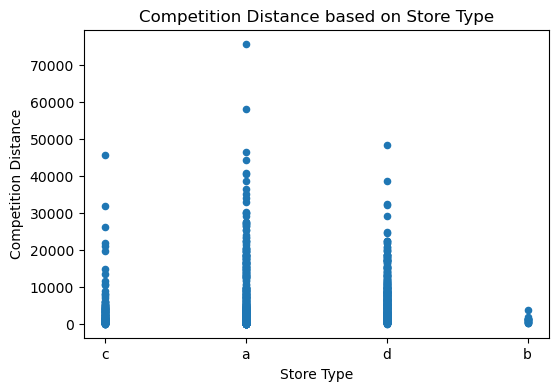

In [42]:
# Let's create scatter plots and box plots with StoreType on the x axis and CompetitionDistance on the y axis using df.plot()
# The purpose of this is to visualize the relationship of distribution distance and store type. 
store.plot('StoreType','CompetitionDistance', kind='scatter', figsize=(6,4), title='Competition Distance based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()

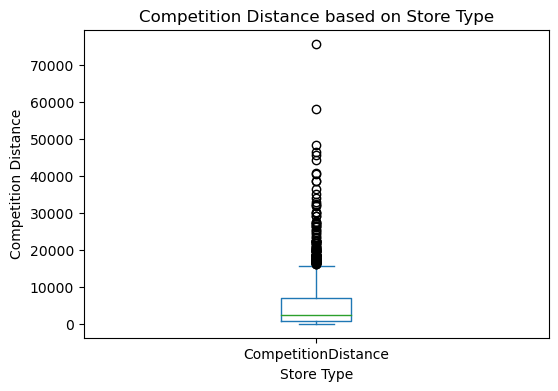

In [43]:
store.plot('StoreType','CompetitionDistance', kind='box', figsize=(6,4), title='Competition Distance based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Competition Distance')
plt.show()

**In conclusion, StoreType a, b and c all has few significant outliers. Generally speaking, the median is at level around 5000, and most data centralized at distance between 0 till 10000. Maximum  distance is just below 20000 if we donnot consider significant outliers. Therefore, mean should be less preferable since outliers would affect normal distribution of CompetitionDistance. The way we treat outliers either could be deleting them (minimise the effects) or replace with another considerable data. I will choose the second option since outliers quantity is not that small, I believe they are still needed to be taken into the consideration.**

In [44]:
# get the median value of CompetitionDistance based on StoreType
# whenStoreType = a
store_a = store.loc[store['StoreType']=='a']
median_store_a = store_a['CompetitionDistance'].median()
print(median_store_a)

1790.0


**by using the same method, we can conclude as follows:**  
median_store_a: 1790  
median_store_b: 900  
median_store_c: 1660  
median_store_d: 5040  

In [45]:
# we calculate median number of those figures
numbers = np.array([1790, 900, 1660, 5040])

# Calculate the median of the array
median_value = np.median(numbers)
print(median_value)

1725.0


In [46]:
# we will use the aboved figures to substitute missing values in the merged DataFrame
imputed_merge = merged_sales_promo.fillna(value={'CompetitionDistance':1725}, inplace=True)

In [47]:
# we can use isna() and sum() to see how many missing values remaining after fillna instruction
merged_sales_promo.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

**The rest of missing values all related to exact month or year that the nearest competitor was opened or exact date that store started participating in Promo2. So we can use single identifier - 'No Exact Date' to illustrate.**

In [48]:
imputed_date = merged_sales_promo.fillna(value={'CompetitionOpenSinceMonth':'No Exact Date'}, inplace=True)

In [49]:
imputed_date = merged_sales_promo.fillna(value={'CompetitionOpenSinceYear':'No Exact Date'}, inplace=True)
imputed_date = merged_sales_promo.fillna(value={'Promo2SinceWeek':'No Exact Date'}, inplace=True)
imputed_date = merged_sales_promo.fillna(value={'Promo2SinceYear':'No Exact Date'}, inplace=True)

In [50]:
merged_sales_promo.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
dtype: int64

**Therefore, we can see only PromoInterval column has missing values.**

In [51]:
# Let's deal with it, firstly to see how it looks like.
merged_sales_promo[merged_sales_promo['PromoInterval'].notna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
942,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
943,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
944,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
945,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
946,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,No Exact Date,No Exact Date,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,No Exact Date,No Exact Date,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,No Exact Date,No Exact Date,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,No Exact Date,No Exact Date,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


**In conlusion, for PomoInterval column, it gives us idea that Promo2 is started every three month, either started from Jan. or Mar. throughout the year. There's not much relative information for us to deeply analyzed in, thesefore I decided to delete this column for data visualation later on.** 

In [52]:
dropped_merge = merged_sales_promo.dropna(axis=0, subset=['PromoInterval'], inplace=True)

In [53]:
# to check whether all missing values are treated/ manipulated
merged_sales_promo.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Therefore, data cleaning process completed and we can move on the next stage.**

### 8.3 Manipulation of datetime 

In [54]:
# Check the data type of column Date
merged_sales_promo['Date']

942        2015-07-31
943        2015-07-30
944        2015-07-29
945        2015-07-28
946        2015-07-27
              ...    
1017204    2013-01-05
1017205    2013-01-04
1017206    2013-01-03
1017207    2013-01-02
1017208    2013-01-01
Name: Date, Length: 509178, dtype: object

**My decision is to change datatype of Date from 'object' into 'DateTime' for further easier operations**

In [55]:
merged_date = pd.to_datetime(merged_sales_promo['Date'])
merged_date

942       2015-07-31
943       2015-07-30
944       2015-07-29
945       2015-07-28
946       2015-07-27
             ...    
1017204   2013-01-05
1017205   2013-01-04
1017206   2013-01-03
1017207   2013-01-02
1017208   2013-01-01
Name: Date, Length: 509178, dtype: datetime64[ns]

In [56]:
merged_sales_promo['Dates'] = merged_date
merged_sales_promo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dates
942,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-31
943,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-30
944,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-29
945,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-28
946,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-27


Because DayOfWeek is displayed with numbers with is not verbally convient to communicate, therefore we'd better to convert the number with **daynames** 

In [57]:
merged_sales_promo['Day'] = merged_sales_promo['Dates'].dt.day_name()
merged_sales_promo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dates,Day
942,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-31,Friday
943,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-30,Thursday
944,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-29,Wednesday
945,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-28,Tuesday
946,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-27,Monday


Now we can drop two columns that might providing duplicated information: DayOfWeek and Date, and naming the new DataFrame as 'new_merged'

In [58]:
new_merged = merged_sales_promo.drop(columns=['DayOfWeek','Date'])
new_merged.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Dates,Day
942,2,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-31,Friday
943,2,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-30,Thursday
944,2,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-29,Wednesday
945,2,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-28,Tuesday
946,2,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015-07-27,Monday


**Therefore, new_merged DataFrame has generated for easier filtering manipulation in the following steps.**

# 9. Exploratory Insights and Visualisation

This section is focusing on tackle the question that related stakeholders care the most. The question is:  
**What is the sales output when viewed according to months, and what insights can be found regarding the effect of Assortment?** 

### 9.1 Pivoting

In [59]:
pivot_sales = pd.pivot_table(new_merged,index=['Dates'], columns='Assortment',values='Sales', aggfunc=np.sum)
pivot_sales

Assortment,a,b,c
Dates,,,
2013-01-01,2401,13922,0
2013-01-02,1712192,14743,1480507
2013-01-03,1580314,13306,1390576
2013-01-04,1675780,11921,1493282
2013-01-05,1425648,11158,1421864
...,...,...,...
2015-07-27,2701601,32721,2595099
2015-07-28,2336203,28833,2171251
2015-07-29,2114360,28887,2071217


### 9.2 Insights 

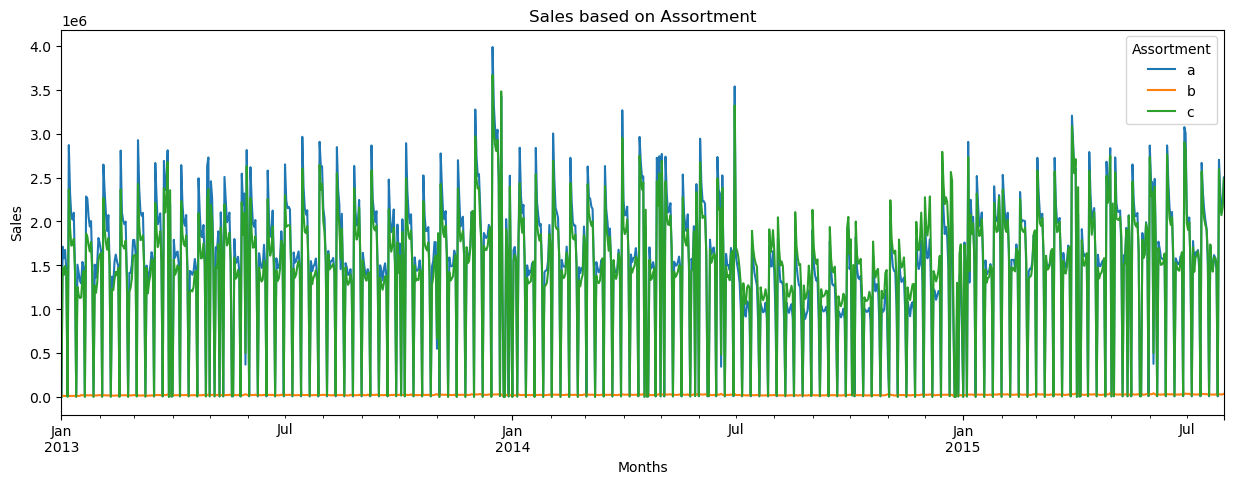

In [60]:
pivot_sales.plot(kind='line',title='Sales based on Assortment',figsize=(15,5))
plt.xlabel('Months')
plt.ylabel("Sales")
plt.show()

This is the overview of sales based on different assortments among 2013 till 2015. Let's break it down into detail.

In [61]:
assort_a = pivot_sales['a']
assort_a.describe()

count    9.420000e+02
mean     1.476421e+06
std      8.071592e+05
min      2.401000e+03
25%      1.207388e+06
50%      1.547978e+06
75%      2.018140e+06
max      3.986681e+06
Name: a, dtype: float64

In [62]:
assort_b = pivot_sales['b']
assort_b.describe()

count      942.000000
mean     24791.363057
std       5246.802882
min      11158.000000
25%      21099.250000
50%      24361.500000
75%      27780.250000
max      46155.000000
Name: b, dtype: float64

In [63]:
assort_c = pivot_sales['c']
assort_c.describe()

count    9.420000e+02
mean     1.430462e+06
std      7.452591e+05
min      0.000000e+00
25%      1.269094e+06
50%      1.541422e+06
75%      1.892227e+06
max      3.668037e+06
Name: c, dtype: float64

In general, assortment type b made least sales while a and c generated similar sales performances among this time period. But type c had 0 sales due to public holidays store closure while type a didn't influenced by those external factors. The sales fluctuation of assortment a is higher than c based on standard deviation. In conclusion, assortment type a generated the highest sales, with higher potential. But a bit more unconsistant performance come with slightly higher sales average than type c.

In [68]:
largesta = assort_a.nlargest(10)
largesta

Dates
2013-12-16    3986681
2014-06-30    3537294
2013-12-23    3428612
2013-12-17    3331138
2013-12-02    3274444
2014-03-31    3266069
2015-03-30    3205557
2015-06-29    3074038
2013-12-18    3070355
2013-12-20    3044341
Name: a, dtype: int64

In [70]:
largestb = assort_b.nlargest(10)
largestb

Dates
2015-05-01    46155
2015-05-25    43242
2015-04-30    42579
2015-06-04    42164
2015-04-06    41623
2015-04-03    41425
2014-06-09    40550
2015-05-14    40480
2015-05-31    39205
2014-05-29    38970
Name: b, dtype: int64

In [73]:
largestc = assort_c.nlargest(10)
largestc

Dates
2013-12-16    3668037
2013-12-23    3481285
2014-06-30    3321703
2015-03-30    3083852
2013-12-17    3039456
2013-12-02    2969924
2014-03-31    2951991
2013-12-20    2929088
2015-06-29    2900832
2013-12-18    2872344
Name: c, dtype: int64

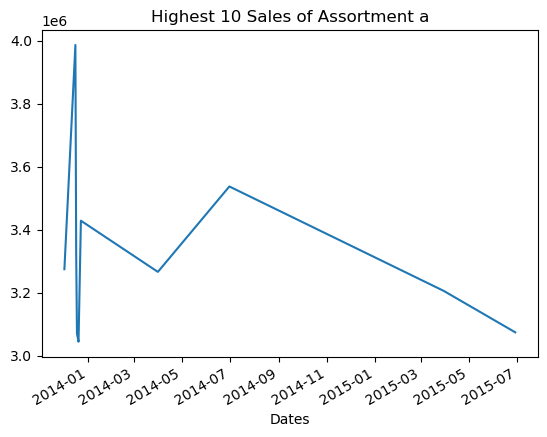

In [77]:
largesta.plot(kind="line", title='Highest 10 Sales of Assortment a')
plt.show()

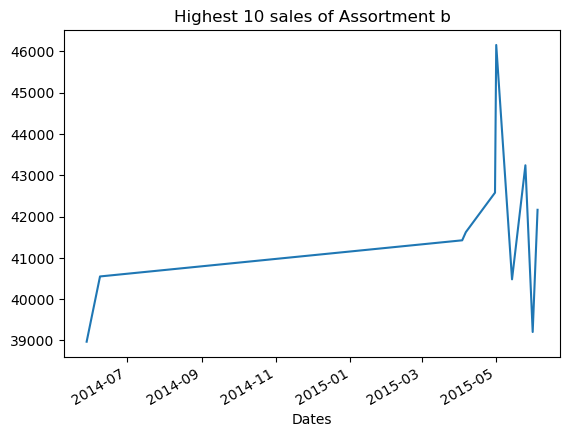

In [79]:
largestb.plot(kind='line', title='Highest 10 sales of Assortment b')
plt.show()

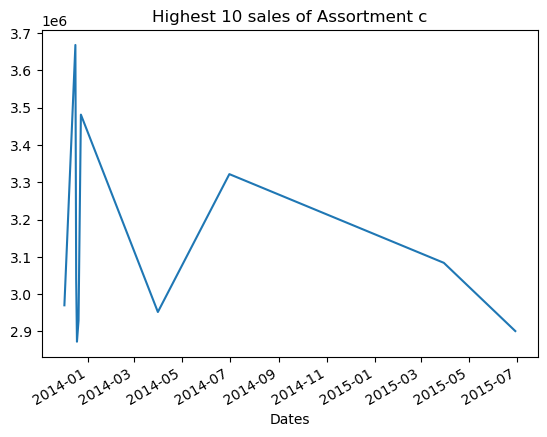

In [80]:
largestc.plot(kind='line', title='Highest 10 sales of Assortment c')
plt.show()

In conclusion, assortment type a and c performed with best sales at Christmas Holiday periods at 2013 while assortment type b played best at Mid-Year sale of 2015. Highest sales performces centralised at mid-year sale (May till June) and end of year Christmas Holidays (December till January). 